# Two ways of reading NOAA CO-OPS data

You can specify the parameters within the URL, or from within Python. With thanks to https://groups.google.com/forum/#!msg/pydap/FH0UQ0QbwTw/FnMP3qZS-0oJ

We'll look at [8570283](https://tidesandcurrents.noaa.gov/stationhome.html?id=8570283), Ocean City Inlet, MD for the date range 2014-08-01 to 2014-09-01.

In [72]:
from pydap.client import open_url, open_dods

# Here we will specify the station id and start/end times in the URL and plot the data

# Use the .dods extension
d = open_dods('http://opendap.co-ops.nos.noaa.gov/erddap/tabledap/IOOS_Hourly_Height_Verified_Water_Level.dods?STATION_ID,latitude,longitude,DATUM,BEGIN_DATE,END_DATE,time,WL_VALUE,SIGMA,I,L&STATION_ID="8570283"&DATUM="MLLW"&BEGIN_DATE="20140801"&END_DATE="20140901"')
s = d['s'] # everything is inside 's'

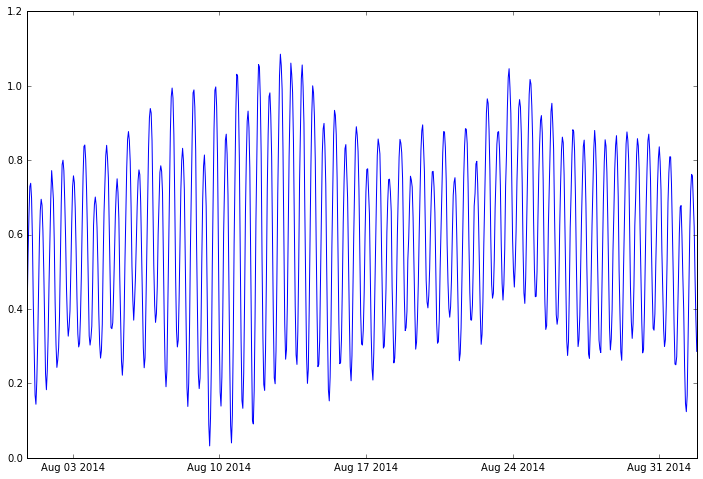

In [73]:
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

t = [datetime.datetime.fromtimestamp(date) for date in s['time'][:]]
wl = s['WL_VALUE'][:]


plt.figure(figsize=(12,8))
plt.plot(t, wl)
plt.show()

In [79]:
# Now we will select the data we want from within Python. 

# Open the dataset without specifying station or start/end times
d = open_url('http://opendap.co-ops.nos.noaa.gov/erddap/tabledap/IOOS_Hourly_Height_Verified_Water_Level')
s = d['s'] # everything is inside 's'

In [89]:
import numpy as np
# print d
start = datetime.datetime(2014,8,1)
end = datetime.datetime(2014,9,1)
lims = (d['s']['STATION_ID'] == 8570283) & (d['s']['BEGIN_DATE'] == start) & (d['s']['END_DATE'] == end)

print s[s['STATION_ID'] == 8570283]

s = np.rec.fromrecords(list(s[s['STATION_ID'] == 8570283].data), names=s[s['STATION_ID'] == 8570283].keys()) 

# enumerate(d['s']['time'][lims][:])

# print lims

# print d['s'][lims]['time']

# plt.figure()
# plt.plot(d['s']['time'][:])
# plt.show()

{'STATION_ID': <pydap.model.BaseType object at 0x113d1c690>, 'latitude': <pydap.model.BaseType object at 0x113d1c750>, 'longitude': <pydap.model.BaseType object at 0x113d1c7d0>, 'DATUM': <pydap.model.BaseType object at 0x113d1c850>, 'BEGIN_DATE': <pydap.model.BaseType object at 0x113d1c8d0>, 'END_DATE': <pydap.model.BaseType object at 0x113d1c950>, 'time': <pydap.model.BaseType object at 0x113d1c9d0>, 'WL_VALUE': <pydap.model.BaseType object at 0x113d1ca50>, 'SIGMA': <pydap.model.BaseType object at 0x113d1cad0>, 'I': <pydap.model.BaseType object at 0x113d1cb50>, 'L': <pydap.model.BaseType object at 0x113d1cc10>}


ValueError: need more than 1 value to unpack

In [90]:
dataset = open_url('http://dapper.pmel.noaa.gov/dapper/argo/argo_all.cdp')

Exception: Unable to parse token: <!DOCTYPE 